In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load Dataset from ZIP
data_path = "/content/individual+household+electric+power+consumption.zip"

df = pd.read_csv(data_path,
                 sep=';',
                 compression='zip',
                 low_memory=False)

print(df.head())



         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
# 1️⃣ Load Dataset
data_path = "/content/individual+household+electric+power+consumption.zip"
df = pd.read_csv(data_path, sep=';', compression='zip', low_memory=False)


In [ ]:
# 2️⃣ Replace '?' with NaN and drop missing rows
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


In [ ]:
# 3️⃣ Convert numeric columns
numeric_cols = df.columns.drop(['Date', 'Time'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)


In [ ]:
# 4️⃣ Create DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                 format='%d/%m/%Y %H:%M:%S')


In [ ]:
# 5️⃣ Feature Engineering
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek



In [ ]:
# 6️⃣ Target & Features

target = 'Global_active_power'
X = df.drop(columns=['Date', 'Time', 'DateTime', target])
y = df[target]

print(df.head())
print(X.shape, y.shape)

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             DateTime  Year  Month  Day  Hour  DayOfWeek  
0 2006-12-16 17:24:00  2006     1

In [ ]:
# === Neural Network Model ===
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === Early Stopping ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# === Train Model ===
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.8192e-04 - mae: 0.0200 - val_loss: 0.0011 - val_mae: 0.0205
Epoch 2/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 9.6461e-04 - mae: 0.0198 - val_loss: 0.0010 - val_mae: 0.0200
Epoch 3/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 9.5892e-04 - mae: 0.0198 - val_loss: 0.0011 - val_mae: 0.0202
Epoch 4/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.5351e-04 - mae: 0.0197 - val_loss: 0.0010 - val_mae: 0.0200
Epoch 5/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 9.4637e-04 - mae: 0.0197 - val_loss: 0.0010 - val_mae: 0.0200
Epoch 6/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 9.4209e-04 - mae: 0.0196 - val_loss: 9.9274e-04 - val_mae: 0.0197
Epoch 7/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 9.3652e-04 - mae: 0.0196 - val_loss: 9.8736e-04 - val_mae: 0.0196
Epoch 8/200
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 9.3155e-04 - mae: 0.0195 - val_loss: 0.0010 - val_

In [ ]:
# -- Prediction --
y_predict_nn =model.predict(X_test_scaled)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step


In [ ]:
# ===== Matrics ====

rmse_nn = np.sqrt(mean_squared_error(y_test, y_predict_nn))
mae_nn = mean_absolute_error(y_test, y_predict_nn)
r2_nn = r2_score(y_test, y_predict_nn)

print()
print(f"RMSE: {rmse_nn}")
print(f"MAE: {mae_nn}")
print(f"R2 Score: {r2_nn}")


RMSE: 0.030364993739893566
MAE: 0.018067179338836666
R2 Score: 0.9991822637274204


In [ ]:
# Dataset Shape
print("Dataset Shape:", df.shape)

# First 5 Rows
print("\n--- First 5 Rows ---")
print(df.head())

# Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


Dataset Shape: (2049280, 15)

--- First 5 Rows ---
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             DateTime  Year  Month  Day  

In [ ]:
# Summary Statistics
print("\n--- Summary Statistics ---")
print(df.describe())



--- Summary Statistics ---
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06   
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e

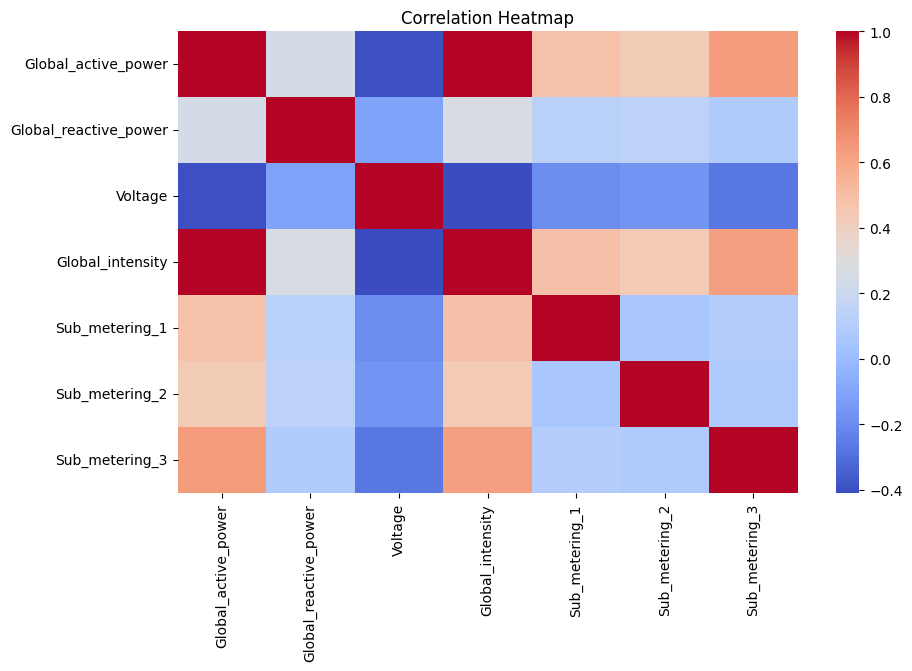

In [ ]:
# Only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


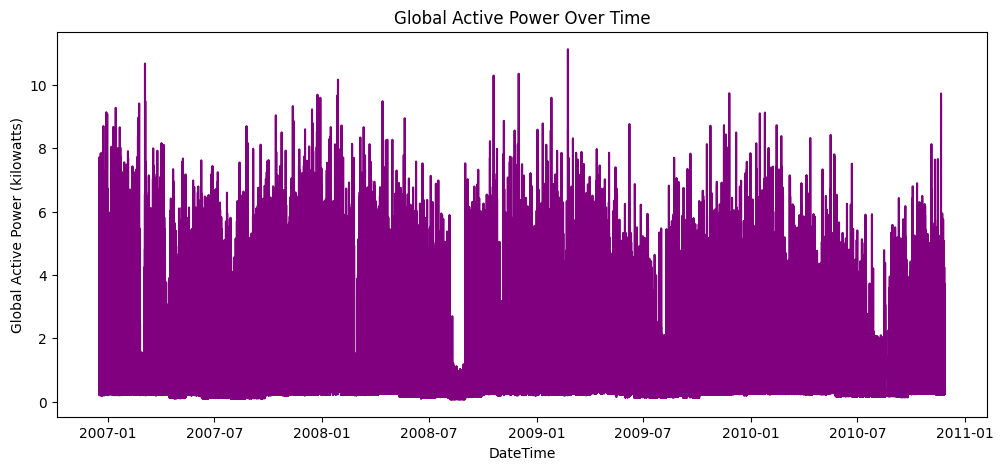

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['DateTime'], df['Global_active_power'], color='purple')
plt.title("Global Active Power Over Time")
plt.xlabel("DateTime")
plt.ylabel("Global Active Power (kilowatts)")
plt.show()


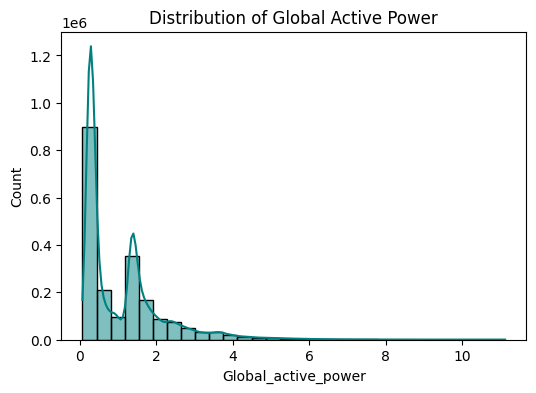

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Global_active_power'], bins=30, kde=True, color='teal')
plt.title("Distribution of Global Active Power")
plt.show()


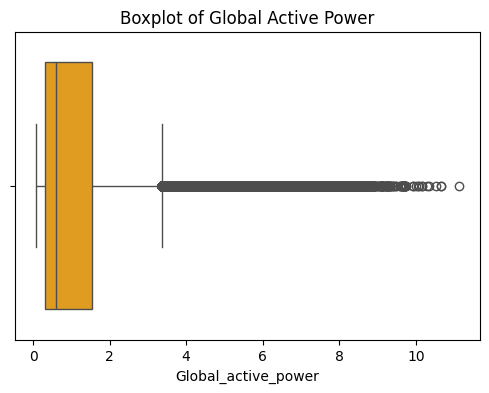

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Global_active_power'], color='orange')
plt.title("Boxplot of Global Active Power")
plt.show()


In [ ]:
print(df.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime', 'Year', 'Month', 'Day', 'Hour',
       'DayOfWeek'],
      dtype='object')


In [ ]:
# Ensure correct column name
df['DateTime'] = pd.to_datetime(df['DateTime'])


In [ ]:
# Set DateTime as index
df.set_index('DateTime', inplace=True)


In [ ]:
# Confirm index type
print(type(df.index))
# <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Missing value handle

df.interpolate(method='time', limit_direction='both', inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


In [ ]:
# Feature Engineering
df.interpolate(method='time', limit_direction='both', inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


In [ ]:
# Target and featuresn split
target = 'Global_active_power'
X = df.drop(columns=[target])
y = df[target]


In [ ]:
# Train_test_split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]



In [ ]:
# Drop non-numeric columns from features
X = X.select_dtypes(include=['float64', 'int64'])


In [ ]:
# # Train-test split (time-series safe)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [ ]:
# Scale numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
# Train-Test Split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [ ]:
# Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 0.0011 - mae: 0.0192 - val_loss: 7.8195e-04 - val_mae: 0.0184
Epoch 2/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0192 - val_loss: 7.8580e-04 - val_mae: 0.0184
Epoch 3/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0192 - val_loss: 7.8599e-04 - val_mae: 0.0185
Epoch 4/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0192 - val_loss: 7.8038e-04 - val_mae: 0.0183
Epoch 5/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0191 - val_loss: 7.9791e-04 - val_mae: 0.0187
Epoch 6/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0191 - val_loss: 7.8784e-04 - val_mae: 0.0186
Epoch 7/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 81s 1ms/step - loss: 0.0011 - mae: 0.0191 - val_loss: 7.8436e-04 - val_mae: 0.0183
Epoch 8/200
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 61s 1ms/step - loss: 0.0011 - mae: 0.0191 - val_loss: 7.969

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 9s 727us/step
RMSE: 0.030588026792544333
MAE: 0.019094226526875376
R²: 0.9988346052250648


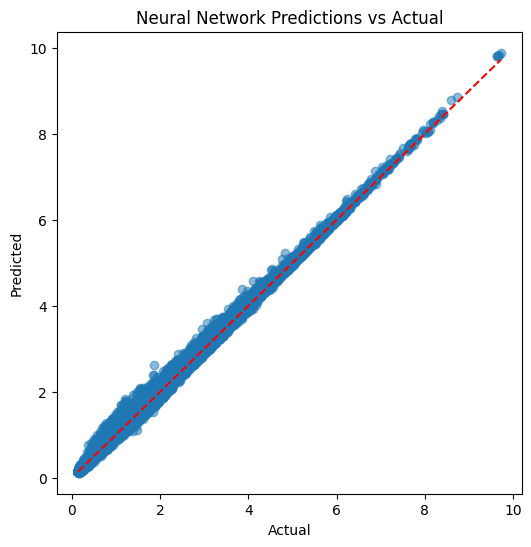

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prediction
y_pred = model.predict(X_test_scaled).ravel()

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
